# Stock Market Prediction from Economic Indicators
<p>Goal</p>
<p>Predict stock market values using linear regression on several economic indicators (PPI, CPI, Oil Prices, Gold Prices, CCI).</p>

### Model Fitting

<ol><li>Input each data set into a dataframe</li>
    <li>Separate the data into training/test sets</li>
    <li>Run the OLE model on the data</li>
    <li>OLE model analysis</li>
    <li>Backward Selection</li>
    <li>Investigate Potential Errors</li>
    </ol>


In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor           #https://etav.github.io/python/vif_factor_python.html

### 1.) Input each data set into a dataframe

In [2]:
#get project data
df_data = pd.read_csv('p1_procesed_data.csv')

### 2.) Separate the data into training/test sets

In [3]:
#from Murat Guner Linear Regression.ipynb
#split the data into training and test data sets
df_xtrain, df_xtest = train_test_split(df_data,test_size = .2)

In [4]:
#confirm the division of data
print('df_data shape:',df_data.shape)
print('df_xtrain shape:',df_xtrain.shape)
print('df_xtest shape:',df_xtest.shape)

df_data shape: (236, 8)
df_xtrain shape: (188, 8)
df_xtest shape: (48, 8)


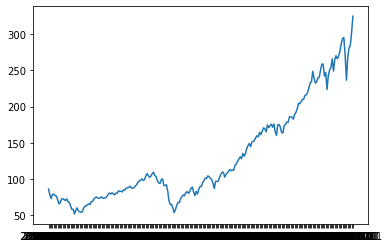

In [5]:
plt.plot(df_data['Date'],df_data['van500'])

In [6]:
df_xtrain.columns

Index(['Unnamed: 0', 'Date', 'cci', 'poilbre', 'pgold', 'cpi', 'ppi',
       'van500'],
      dtype='object')

In [7]:
df_xtrain.head()

,Unnamed: 0,Date,cci,poilbre,pgold,cpi,ppi,van500
183,183,2016-04-01,100.57800,42.247619,1242.261905,238.835,173.6,175.496582
220,220,2019-05-01,101.49760,70.526522,1283.947619,255.167,198.5,248.792465
63,63,2006-04-01,99.85950,70.432500,610.652778,200.700,133.3,90.057884
88,88,2008-05-01,96.65824,123.494545,888.662500,215.208,156.4,100.131546
126,126,2011-07-01,97.11068,116.460952,1572.809524,225.395,173.2,99.292946


### 3.) Run the OLE model on the data

In [8]:
#from Murat Guner Linear Regression.ipynb
X = df_xtrain[['cci', 'poilbre', 'pgold','cpi','ppi']]
y = df_xtrain.van500
X = sm.add_constant(X)
mod = sm.OLS(y, X, hasconst= True)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                 van500   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     397.3
Date:                Mon, 21 Sep 2020   Prob (F-statistic):           6.99e-96
Time:                        20:41:17   Log-Likelihood:                -821.55
No. Observations:                 188   AIC:                             1655.
Df Residuals:                     182   BIC:                             1675.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1586.4296    143.702    -11.040      0.0

#### 4.) OLE Model Analysis

#### Question: Is there a Relationship between the response and the predictors?

To determine whether there is a relationship between the repsonse and the predictors, we  use a hypothesis test, asking:
\begin{align}
\beta_{1}=\beta_{2}=\beta_{3}=\beta_{4}=\beta_{5}=0
\end{align}
<p>The test is run by calculating the F-statistic.  If the resulting statistic is greater than 1 the null hypothesis is rejected and there is at least one predictor that is related to the value of the vanguard 500.  In the OLS Regression results above the F-statistic is 391.</p>  Therefore at least one predictor is related to the response variable.

Which variables are important? (Feature Engineering)

Of the five predictors, two have values that are less significant than they others: pgold and ppi.  I will perform backwards selection an remove the pgold variable and assess the effect on the model.  I will use p>=3 as my stop rule. 

### 5.) Backward Selection

#### Drop the pgold variable

In [9]:
df_data.drop(columns='pgold', inplace =True)

In [10]:
df_xtrain, df_xtest = train_test_split(df_data,test_size = .2)
X = df_xtrain[['cci', 'poilbre', 'cpi','ppi']]
y = df_xtrain.van500
X = sm.add_constant(X)
mod = sm.OLS(y, X, hasconst= True)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                 van500   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     497.7
Date:                Mon, 21 Sep 2020   Prob (F-statistic):           3.84e-97
Time:                        20:41:17   Log-Likelihood:                -823.38
No. Observations:                 188   AIC:                             1657.
Df Residuals:                     183   BIC:                             1673.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1732.7933    131.136    -13.214      0.0

#### Backward Selection Analysis (dropping pgold)

<p> Dropping pgold seems to have been effective.  R-squared increased from .922 to .924, which I will read as no change.  The F-statistic increased from 430 to 537, meaning my predictors are still related to the reponse variable.  The p-value of ppi has increased from 0.067 to 0.432.  I will continue with backwards selection.  I will continue to use p>=3 as my stop rule. 

#### Drop the ppi variable

In [11]:
df_data.drop(columns='ppi', inplace =True)

In [12]:
df_xtrain, df_xtest = train_test_split(df_data,test_size = .2)
X = df_xtrain[['cci', 'poilbre', 'cpi']]
y = df_xtrain.van500
X = sm.add_constant(X)
mod = sm.OLS(y, X, hasconst= True)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                 van500   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     783.4
Date:                Mon, 21 Sep 2020   Prob (F-statistic):          1.69e-104
Time:                        20:41:17   Log-Likelihood:                -808.10
No. Observations:                 188   AIC:                             1624.
Df Residuals:                     184   BIC:                             1637.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1868.9872    112.343    -16.636      0.0

#### Backward Selection Analysis (droping ppi)

<p> Dropping ppi was effective.  While R-squared decreased from .924 to .911, the change is small and R-squared is affected by then number of predictors regardless of the predictive ability.  Therefore I will read the decrease in p-value as no change.  The F-statistic further increased from 537 to 629, meaning my predictors are still related to the reponse variable.  The p-value of the remaining predictors is tiny, suggesting they are statistically significant.

In [13]:
#from Murat Guner Linear Regression.ipynb
Xtest = df_xtest[['cci', 'poilbre', 'cpi']]
ytest = df_xtest.van500
Xtest = sm.add_constant(Xtest)

res.predict(Xtest);

### 6.) Investigate Potential Errors: 
#### Data Linearity, Error Constancy, Outliers, and High Leverage Points

The residuals plots pairs predicted values with corresponding residuals and can be used to provide evidence concerning <b>data linearity</b>, <b>error constancy</b>, <b>outliers</b>, and <b>high leverage points.</b>  

##### Data Linearity:
<p>A core assumption of the linear regression model is that there is a linear relationship between the predictors and the response.  If this assumption holds, there should be little to no discernible pattern in the residuals plot.  Reviewing the plot below suggests that there is a weak cosine-like pattern to the residuals, challegning the assumption of linearity.</p>

##### Error Constancy
<p>A second assumption in the linear regression model is that the error terms have a constant variance.  If this assumption holds the error terms should have no discernible pattern.  The same observation concerning the cosine-like pattern applies here as well.  However, it appears that this pattern speaks more to the non-linear nature of the model than to a pattern in the error terms.</p>

##### Outliers
<p>There are four clear outliers in the data that should be removed, and the model re-run.</p>

##### High Leverage Points
<p>High leverage points occur when one or more predictors have unsual values.  There are no high leverage points in the data.</p>

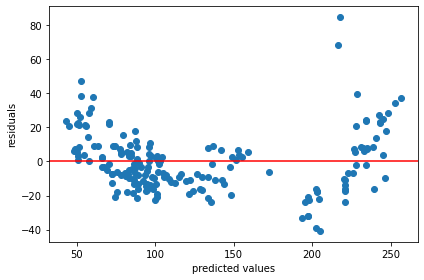

In [14]:
#from Murat Guner Linear Regression.ipynb
residuals = res.resid

y_pred = res.predict(X)
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color = 'red', label = '0')

plt.xlabel('predicted values')

plt.ylabel('residuals')

plt.tight_layout()

#### Non-Correlation of Error Terms

<p>The linear regression model assumes that the error terms are uncorrelated (i.e. one error term provides no information on the adjacent terms).  If this is true a plot of the residuals across time should appear random.  The below plot of residuals against time provides evidence that the error terms are uncorrlated.</p>

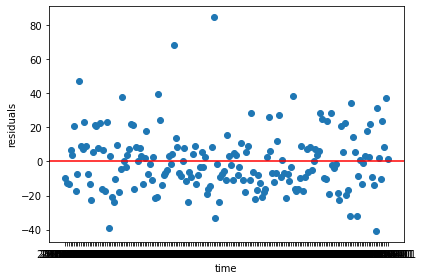

In [15]:
time = df_xtrain['Date']
residuals = res.resid


plt.scatter(time, residuals)
plt.axhline(y=0, color = 'red', label = '0')

plt.xlabel('time')

plt.ylabel('residuals')

plt.tight_layout()

#### Multicollinearity 

<p>Multicollinearity occurs when two or more variables are highly correlated.  A good method for testing for multicollinearity is to use the Variance Inflation Factor (VIF).  Values close to 1 suggest a small amount of collinearity among the variables.  The one term that exceeds the threshold of a 5 to 10 VIF value is the constant term and should be ignored.  The predictors all have values near 1 and therefore there is only a small amount of collinearity in the data.</p>


In [18]:
# https://stackoverflow.com/questions/42258241/vif-by-coef-in-ols-regression-results-pythonvariables = res.model.exog
variables = res.model.exog
vif = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]
vif 

[7325.576245159567, 1.6159142655946408, 2.029852823314241, 1.4727510610453738]